<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Simpson Image Analysis Using numpy <br><br><br>Analysis using numpy</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Data Source: Flikr</p>

In diese Notebook, eine Image dataset wird analysiert mit numpy Library

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">wir brauchen  paar Programm Bibliothek zu importieren : numpy, scipy, matplotlib</p>

In [3]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import imageio

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
eines Numpy-Arrays aus einer Bilddatei erstellen:</p> 



In [4]:
from skimage import data
import os

photo_data = imageio.imread('C:/Users/Akademie/Desktop/data_externe/Main_simpson.jpg')
type(photo_data)

imageio.core.util.Array

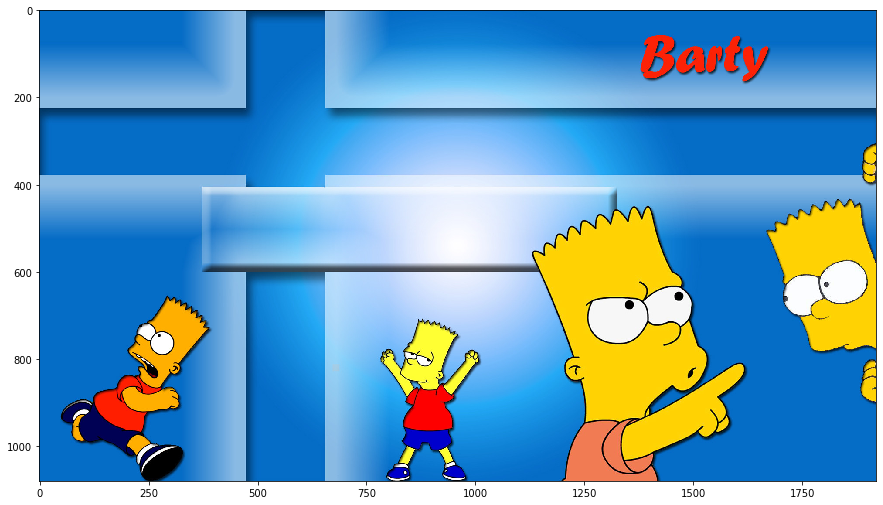

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)


In [6]:
photo_data.shape

(1080, 1920, 3)

In [7]:
photo_data.size

6220800

In [8]:
photo_data.min(),photo_data.max()

(0, 255)

In [9]:
photo_data.mean()

141.4823353909465

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Pixel in der 150er Reihe und 250er spalte</p>

In [10]:
photo_data[150,250]

Array([ 84, 154, 216], dtype=uint8)

In [11]:
photo_data[150,250,1]

154

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Ein Pixel setzen auf null</p>


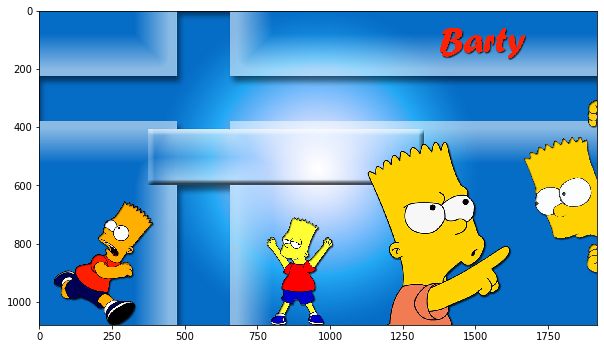

In [12]:
photo_data[150,250] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Farbe ändern in einem Bereich<p/>
<br/>


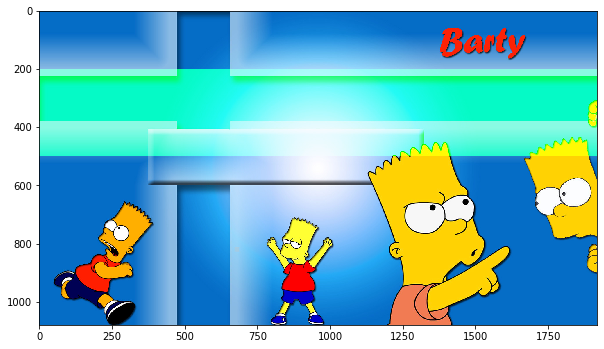

In [13]:
photo_data = imageio.imread('C:/Users/Akademie/Desktop/data_externe/Main_simpson.jpg')

photo_data[200:500, : , 1] = 250
plt.figure(figsize = (10,10))
plt.imshow(photo_data)



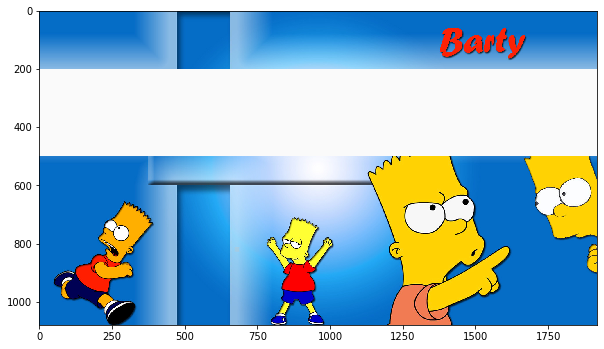

In [14]:
photo_data = imageio.imread('C:/Users/Akademie/Desktop/data_externe/Main_simpson.jpg')

photo_data[200:500, : ] = 250
plt.figure(figsize = (10,10))
plt.imshow(photo_data)


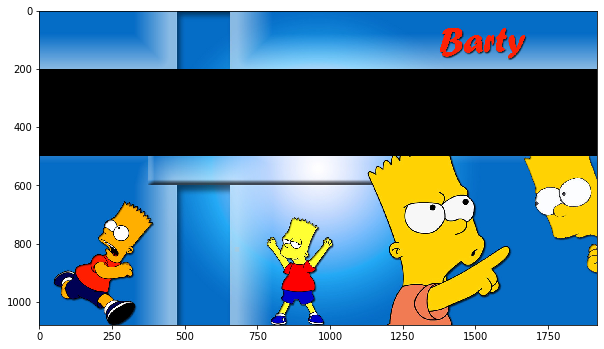

In [15]:
photo_data = imageio.imread('C:/Users/Akademie/Desktop/data_externe/Main_simpson.jpg')

photo_data[200:500, : ] = 0
plt.figure(figsize = (10,10))
plt.imshow(photo_data)

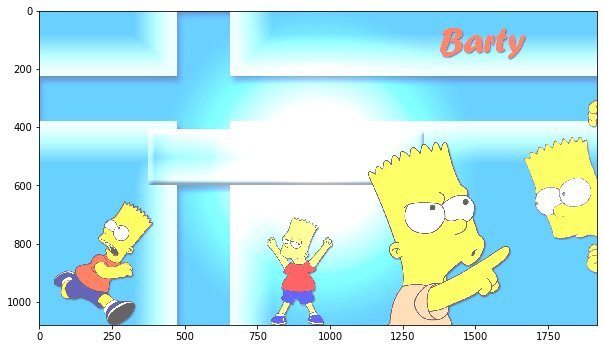

In [16]:
# Bild Heller
photo_data = imageio.imread('C:/Users/Akademie/Desktop/data_externe/Main_simpson.jpg')
photo_data_brighter = photo_data[:,:] + 100

photo_data_brighter[photo_data_brighter<photo_data] = 255



plt.figure(figsize = (10,10))
plt.imshow(photo_data_brighter)




<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Pixel mit Nidrigen werten auswählen</p>

In [17]:
photo_data = imageio.imread('C:/Users/Akademie/Desktop/data_externe/Main_simpson.jpg')

print("shape of photo_data: ", photo_data.shape)
low_value_filter = photo_data <50
print("shape of low_value_filter: ", low_value_filter.shape)
print("shape of low_value_filter: ", photo_data[low_value_filter].shape)



shape of photo_data:  (1080, 1920, 3)
shape of low_value_filter:  (1080, 1920, 3)
shape of low_value_filter:  (1335931,)


In [18]:
photo_data[low_value_filter]

Array([5, 5, 5, ..., 5, 5, 5], dtype=uint8)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Nidrige Werte Filtern</p><br/>
Wenn der Filter mit niedrigem Wert True ist, der wert auf 0 setzen.

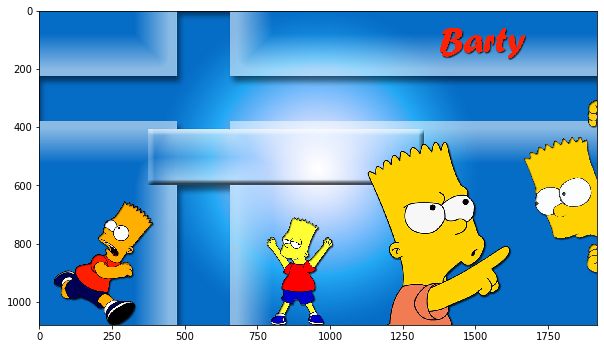

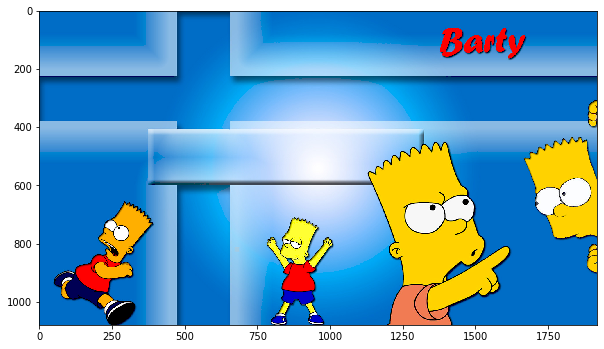

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize = (10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Weitere Zeilen- und Spaltenoperationen</p><br>


In [20]:
rows_range = np.arange(photo_data.shape[0])
cols_range = np.arange(photo_data.shape[1])


In [21]:
#photo_data[rows_range,cols_range,:2] = 0
photo_data.shape

(1080, 1920, 3)

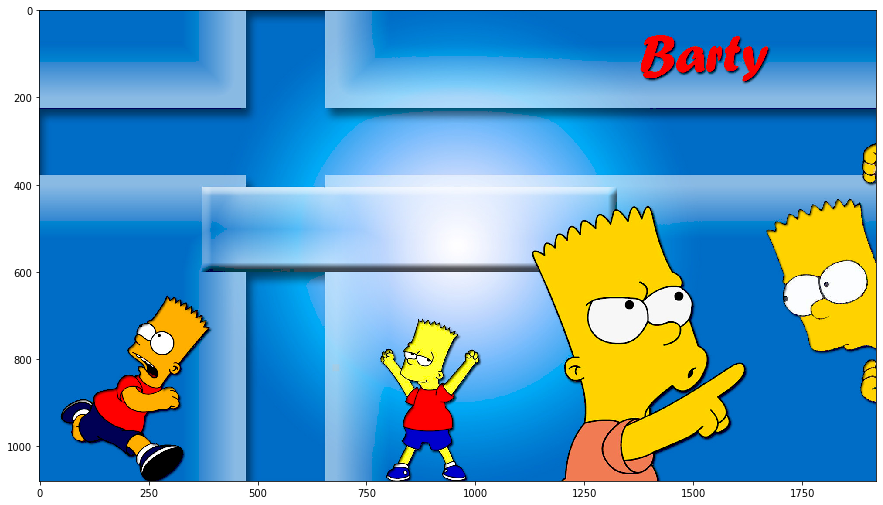

In [22]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Bild mit PIL Verarbeiten</p><br>

In [23]:
from PIL import Image 

img = Image.open('C:/Users/Akademie/Desktop/data_externe/Main_simpson.jpg')
img = img.resize((round(img.size[0]/5),round(img.size[1]/5)),resample = Image.LANCZOS)

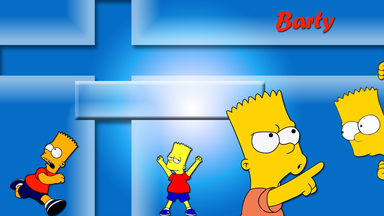

In [24]:
img

In [25]:
img.size

(384, 216)

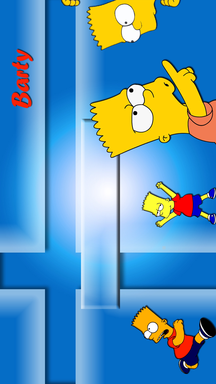

In [26]:
img.rotate(90,expand=True)

In [27]:
img.save('test_simpson.jpg')

In [28]:
from PIL import ImageDraw

draw = ImageDraw.Draw(img)

points = [
    (100,100),
    (100,250)
]
draw.line(points,'red',5)

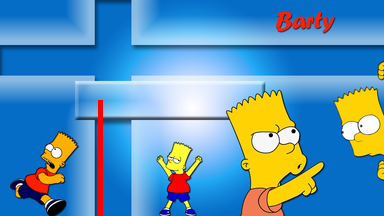

In [29]:
img

In [30]:
draw.rectangle([
    (50,50),
    (150,150)
],outline = 'yellow')

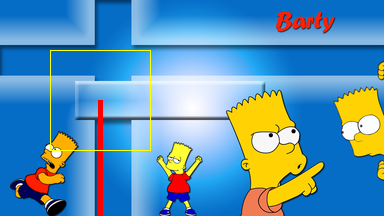

In [31]:
img

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Bild maskieren</p>


In [32]:
photo_data = imageio.imread('C:/Users/Akademie/Desktop/data_externe/Main_simpson.jpg')

rows,cols,layers = photo_data.shape

X,Y = np.ogrid[:rows,:cols]
print('X = ',X,'\nY = ',Y)

X =  [[   0]
 [   1]
 [   2]
 ...
 [1077]
 [1078]
 [1079]] 
Y =  [[   0    1    2 ... 1917 1918 1919]]


In [33]:
center_row , center_col = rows/2 , cols/2
print('center_row =',center_row,'AND center_col = ',center_col)
#print(X - center_row)
#print(Y - center_col)

dist_from_center = (X - center_row)**2 + (Y - center_col) **2
#print(dist_from_center)
print(dist_from_center.shape)
#print(dist_from_center[500,1000])
radius = (rows/2)**2
#print('Radius =',radius)
circular_mask = (dist_from_center > radius)
print(circular_mask)


center_row = 540.0 AND center_col =  960.0
(1080, 1920)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


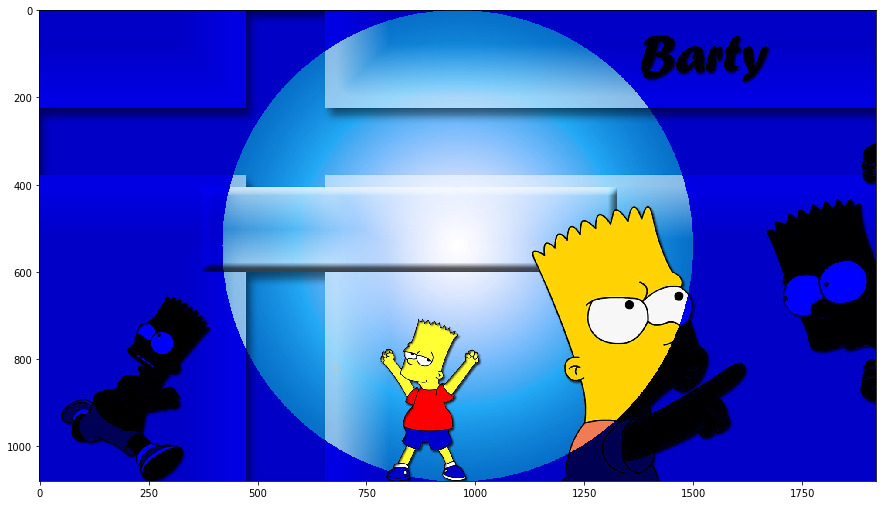

In [34]:
photo_data = imageio.imread('C:/Users/Akademie/Desktop/data_externe/Main_simpson.jpg')

photo_data[circular_mask,:2] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
weitere Maskierung</p>
<br/>Die Maske Weiter Entwickeln,die obere hälfte der disk nehmen.

In [35]:
X,Y = np.ogrid[:rows,:cols]
half_upper = X < center_row

half_upper_mask = np.logical_and(half_upper,circular_mask)
print(half_upper)
print(half_upper_mask)

[[ True]
 [ True]
 [ True]
 ...
 [False]
 [False]
 [False]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


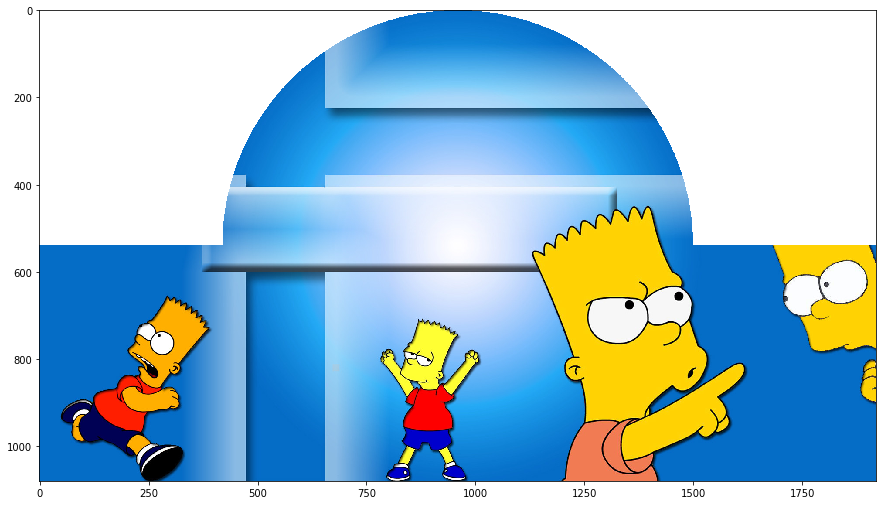

In [36]:
photo_data = imageio.imread('C:/Users/Akademie/Desktop/data_externe/Main_simpson.jpg')

photo_data[half_upper_mask] = 255
plt.figure(figsize = (15,15))
plt.imshow(photo_data)